In [141]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [142]:
def calculate_netsalary(salary_data):
    del salary_data['GrossPay'];
    # Turning pay columns into numeric ones and create TotalPay column:
    salary_data[['RegularPay', 'OvertimePay', 'OtherPay']] = salary_data[['RegularPay', 'OvertimePay', 'OtherPay']].apply(pd.to_numeric)  
    salary_data['TotalPay'] = salary_data['RegularPay'] + salary_data['OvertimePay'] + salary_data['OtherPay']
    return salary_data

In [143]:
def summarize_data(salary_data):
    print('Data name:' + str(salary_data));
    salary_data.dropna();  # eliminate na rows
    print('Mean: ' + str(salary_data.mean()));  
    print('Max: ' + str(salary_data.max()));  
    print('Min: ' + str(salary_data.min()));  

In [144]:
uc_name = ['sandiego', 'losangeles', 'berkeley']  # can be added other UC schools
file_name = 'ucop' + '_' + uc_name[1] + '.csv'

In [145]:
salary_data = pd.read_csv(file_name, thousands=',')
salary_data = calculate_netsalary(salary_data)

In [146]:
salary_data_professors = salary_data[salary_data['Title'].str.contains("PROF")]
assoc_prof = salary_data_professors[salary_data_professors['Title'].str.contains('ASSOC')]
assist_prof = salary_data_professors[salary_data_professors['Title'].str.contains('ASST')]
full_prof = pd.concat([salary_data_professors, assoc_prof]).drop_duplicates(keep=False)
full_prof = pd.concat([full_prof, assist_prof]).drop_duplicates(keep=False)

In [147]:
print('Total number of professors: ' + str(len(salary_data_professors)))  
print('Total number of assistant professors: ' + str(len(assist_prof)))
print('Total number of associate professors: ' + str(len(assoc_prof))) 
print('Total number of full professors: ' + str(len(full_prof))) 

Total number of professors: 3980
Total number of assistant professors: 1178
Total number of associate professors: 702
Total number of full professors: 2100


In [148]:
total_payment = salary_data_professors['TotalPay'];
total_payment_assist = assist_prof['TotalPay'];
total_payment_assoc = assoc_prof['TotalPay'];
total_payment_prof = full_prof['TotalPay'];

summarize_data(total_payment);
summarize_data(total_payment_assist);
summarize_data(total_payment_assoc);
summarize_data(total_payment_prof);

Data name:1827      39839.0
1840      40031.0
2273      34509.0
2733       7445.0
3588      13221.0
           ...   
68426    380832.0
68442    222827.0
68446    206817.0
68449    185829.0
68477    148525.0
Name: TotalPay, Length: 3980, dtype: float64
Mean: 236519.9150753769
Max: 2483249.0
Min: 51.0
Data name:1827      39839.0
1840      40031.0
2273      34509.0
3924      46310.0
5582      60512.0
           ...   
68378     52321.0
68390     16171.0
68412     27750.0
68442    222827.0
68449    185829.0
Name: TotalPay, Length: 1178, dtype: float64
Mean: 185965.26740237692
Max: 1459174.0
Min: 51.0
Data name:20120      2810.0
20173    437500.0
20206    134792.0
20213    465306.0
20350    280858.0
           ...   
68162    123750.0
68207    273105.0
68223    145025.0
68233    212948.0
68327    170474.0
Name: TotalPay, Length: 702, dtype: float64
Mean: 249991.66951566952
Max: 1814375.0
Min: 1496.0
Data name:2733       7445.0
3588      13221.0
3958     420452.0
5309     221683.0
8906     

In [149]:
x1 = list(total_payment_prof)
x2 = list(total_payment_assoc)
x3 = list(total_payment_assist) 

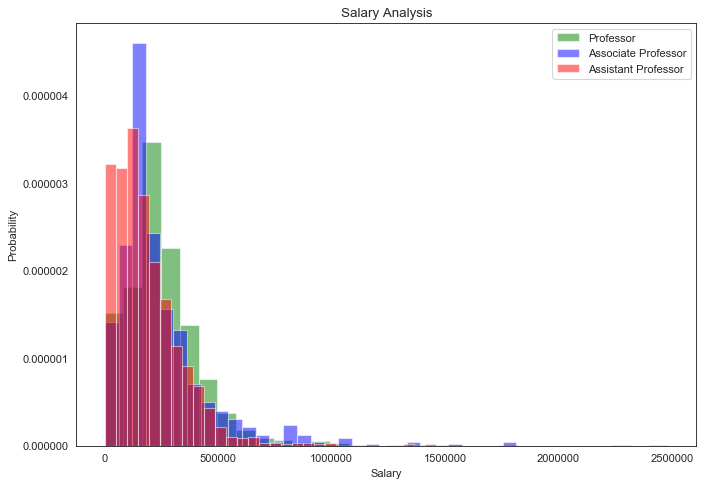

In [150]:
kwargs = dict(alpha=0.5, bins=30, density=True, stacked=True)

plt.figure(figsize=(10,7), dpi= 80)
plt.hist(x1, **kwargs, color='g', label='Professor')
plt.hist(x2, **kwargs, color='b', label='Associate Professor')
plt.hist(x3, **kwargs, color='r', label='Assistant Professor')
plt.gca().set(title='Salary Analysis', ylabel='Probability', xlabel='Salary')
plt.legend();

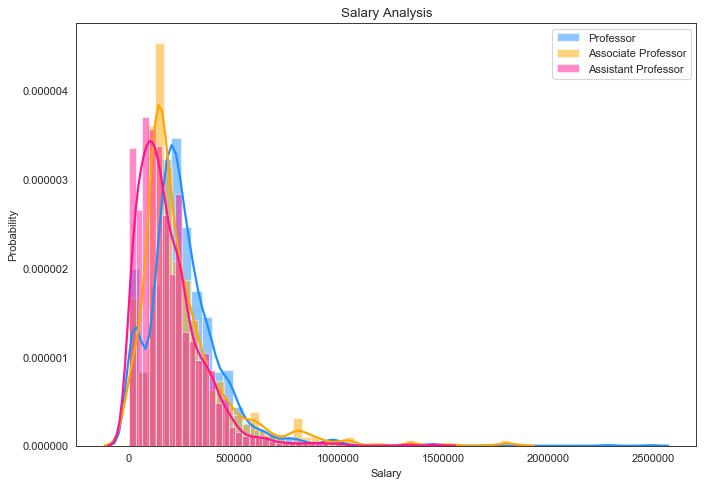

In [151]:
sns.set_style("white")

# Plot
kwargs = dict(hist_kws={'alpha':0.5}, kde_kws={'linewidth':2})

plt.figure(figsize=(10,7), dpi= 80)
plt.gca().set(title='Salary Analysis', ylabel='Probability', xlabel='Salary')
sns.distplot(x1, color="dodgerblue", label="Professor", **kwargs)
sns.distplot(x2, color="orange", label="Associate Professor", **kwargs)
sns.distplot(x3, color="deeppink", label="Assistant Professor", **kwargs)
plt.legend();

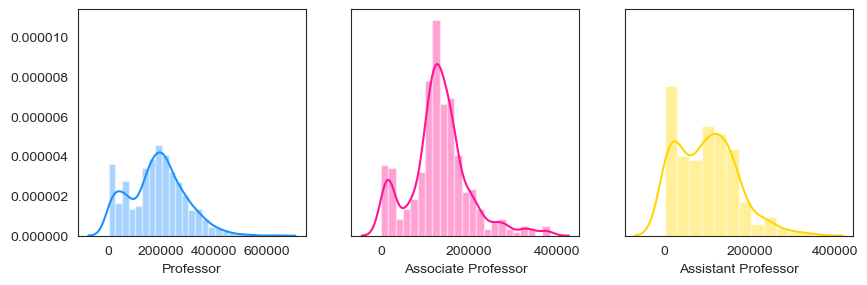

In [152]:
# Import data
x1 = professor_payment
x2 = associate_professor_payment 
x3 = assistant_professor_payment

# plot
fig, axes = plt.subplots(1, 3, figsize=(10, 3), sharey=True, dpi=100)
sns.distplot(x1 , color="dodgerblue", ax=axes[0], axlabel='Professor')
sns.distplot(x2 , color="deeppink", ax=axes[1], axlabel='Associate Professor')
sns.distplot(x3 , color="gold", ax=axes[2], axlabel='Assistant Professor')